<a href="https://colab.research.google.com/github/AmeerTechsoft/Data-science-project/blob/main/Twitterlitics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Understanding

###Declearing needed dependencies



*   **[Pandas](https://pypi.org/project/pandas/)** is a Python package that provides fast, flexible, and expressive data structures designed to make working with "relational" or "labeled" data both easy and intuitive.

*   **[NumPy](https://www.javatpoint.com/numpy-tutorial)** stands for numeric python which is a python package for the computation and processing of the multidimensional and single dimensional array elements



In [ ]:
import pandas as pd
import numpy as np

###Importing the dataset into a dataframe

In [ ]:
df = pd.read_json('/content/drive/MyDrive/datasets/CETM47-22_23-AS2-Data.json')

In [ ]:
print(df)

                                                   text       date  label  \
0     The {@Clinton LumberKings@} beat the {@Cedar R... 2019-09-08      4   
1     I would rather hear Eli Gold announce this Aub... 2019-09-08      4   
2     Someone take my phone away, I’m trying to not ... 2019-09-08      4   
3     A year ago, Louisville struggled to beat an FC... 2019-09-08      4   
4     Anyone know why the #Dodgers #Orioles game nex... 2019-09-08      4   
...                                                 ...        ...    ...   
6438  Praying for {{USERNAME}} family friends riding... 2021-08-29      3   
6439  Etsy: {{USERNAME}} Hi there, I m sorry to hear... 2021-08-29      1   
6440  Imagine how hard it is to be a Teume. Everyone... 2021-08-29      2   
6441  Ride With Me - Mental Health Awareness Charity... 2021-08-29      2   
6442  Prediction: The future of CX in {@McKinsey Com... 2021-08-29      1   

                       id                label_name  
0     117051632441986

In [ ]:
print(df['text'])

0       The {@Clinton LumberKings@} beat the {@Cedar R...
1       I would rather hear Eli Gold announce this Aub...
2       Someone take my phone away, I’m trying to not ...
3       A year ago, Louisville struggled to beat an FC...
4       Anyone know why the #Dodgers #Orioles game nex...
                              ...                        
6438    Praying for {{USERNAME}} family friends riding...
6439    Etsy: {{USERNAME}} Hi there, I m sorry to hear...
6440    Imagine how hard it is to be a Teume. Everyone...
6441    Ride With Me - Mental Health Awareness Charity...
6442    Prediction: The future of CX in {@McKinsey Com...
Name: text, Length: 6443, dtype: object


### Checking for empty cells


In [ ]:
df.isna().sum()

text          0
date          0
label         0
id            0
label_name    0
dtype: int64

###Check for dupicated values

In [ ]:
df.duplicated().values.any()

False

In [ ]:
df.isnull().any()

text          False
date          False
label         False
id            False
label_name    False
dtype: bool

### Checking the number of unique label

In [ ]:
data['label'].unique()

array([4, 2, 3, 1, 5, 0])

###Checking if each row is unique using the "id" column

In [ ]:
df['id'].unique().any()

True

In [ ]:
df['id'].nunique()

6443

###Making a count plot of the labels



*   **[Seaborn](https://seaborn.pydata.org/)** is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.




<Axes: xlabel='label', ylabel='count'>

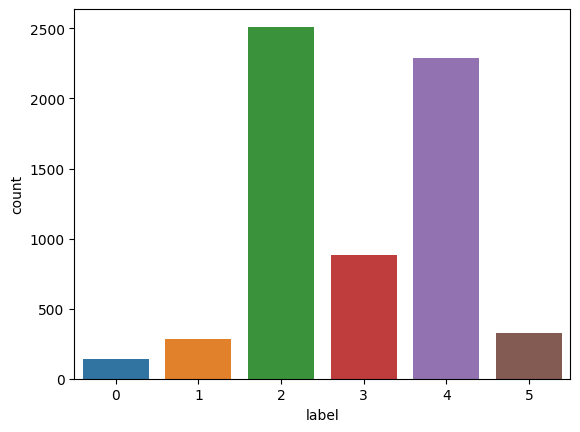

In [ ]:
import seaborn as sns
sns.countplot(x='label', data=df)

###Relating the label to the label_names

In [ ]:
for label_name, group in df.groupby("label_name"):
    labels = ", ".join(str(x) for x in group.label.unique())
    print(f"{label_name}: {labels}")


arts_&_culture: 0
business_&_entrepreneurs: 1
daily_life: 3
pop_culture: 2
science_&_technology: 5
sports_&_gaming: 4


.

.

#Data Prepareration

###Selecting the "text" and "label" column since we will be trying to classify the test into a class

In [ ]:
data_df = df[['text','label']]

In [ ]:
data_df

,text,label
0,The {@Clinton LumberKings@} beat the {@Cedar R...,4
1,I would rather hear Eli Gold announce this Aub...,4
2,"Someone take my phone away, I’m trying to not ...",4
3,"A year ago, Louisville struggled to beat an FC...",4
4,Anyone know why the #Dodgers #Orioles game nex...,4
...,...,...
6438,Praying for {{USERNAME}} family friends riding...,3
6439,"Etsy: {{USERNAME}} Hi there, I m sorry to hear...",1
6440,Imagine how hard it is to be a Teume. Everyone...,2
6441,Ride With Me - Mental Health Awareness Charity...,2


###Seperating the data by their labels into individual dataframe

In [ ]:
data_ac = data_df[data_df['label'] == 0]
data_be = data_df[data_df['label'] == 1]
data_pc = data_df[data_df['label'] == 2]
data_dl = data_df[data_df['label'] == 3]
data_sg = data_df[data_df['label'] == 4]
data_st = data_df[data_df['label'] == 5]

####Printing the size and information of each seperated label

In [ ]:
print(data_ac.info())
print("")
print(data_be.info())
print("")
print(data_pc.info())
print("")
print(data_dl.info())
print("")
print(data_sg.info())
print("")
print(data_st.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 167 to 6417
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    144 non-null    object
 1   label   144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ KB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 109 to 6442
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    287 non-null    object
 1   label   287 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2512 entries, 21 to 6441
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2512 non-null   object
 1   label   2512 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 58.9+ KB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883 entries, 104 to 6438
Dat

In [ ]:
print(data_be)

                                                   text  label
109   VanillaLace vs dupe with pink himalayan sea sa...      1
150   Great to see another Aussie world-leading busi...      1
234   . {{USERNAME}} named Top 100 winery in the wor...      1
240   8 Companies Utilizing AI to Tackle Climate Cha...      1
243   Another SCAM in the making ? {{USERNAME}} {@ET...      1
...                                                 ...    ...
6415  Great scoop by {@Killian Woods@} and {@Donal M...      1
6424  The future of payments in the Middle East {{UR...      1
6435  Etsy: {{USERNAME}} Hi! I m glad that everythin...      1
6439  Etsy: {{USERNAME}} Hi there, I m sorry to hear...      1
6442  Prediction: The future of CX in {@McKinsey Com...      1

[287 rows x 2 columns]


###Concatinating the seperated label back together

In [ ]:
concat_data = pd.concat([data_ac, data_be, data_pc, data_dl, data_sg, data_st])

In [ ]:
concat_data['text']

167     I was going to announce this last week, but as...
193     Shadows Daily Dose of #Beauty & #AltModel #New...
278     Lakshmi puja is performed during Diwali to inv...
294     “In 1919, Sylvia Beach sent a telegram to her ...
420     The 50 Most Beautiful Cities in the World {{UR...
                              ...                        
6316    Shoutout to {{USERNAME}} for being the coolest...
6364    Check out COAST GUARD MUG US ARMY ALLISON GARR...
6365    Check out COAST GUARD MUG AIR STATION CAPE COD...
6408    I should get paid for the amount of boomers th...
6437    The future outlook of #IoT technologies and ap...
Name: text, Length: 6443, dtype: object

##Cleaning the "text" column

####Converting every entity in the text column to lowercase to Lower Case

In [ ]:
concat_data['text']=concat_data['text'].str.lower()

####Removing the characters encased in "{ }" eg {{USERNAME}}, {{URL}} etc




*   **"[import re](https://www.w3schools.com/python/python_regex.asp)"**: A RegEx, or Regular Expression, is a sequence of characters that forms a search pattern.
*   **[import string](https://www.digitalocean.com/community/tutorials/python-string-module)** Python String module contains some constants, utility function, and classes for string manipulation



In [ ]:
import re
import string

def remove_template(text):
    deleted_items = []
    def replace(match):
        deleted_items.append(match.group())
        return ''
    cleaned_text = re.sub(r'\{.*?}', replace, text)
    num_deleted = len(deleted_items)
    print(f"Deleted {num_deleted} occurrence(s) of '{{ }}': {deleted_items}")
    return cleaned_text

# Apply the remove_template function to the 'text' column of the DataFrame
concat_data['text_puncuations'] = concat_data['text'].apply(remove_template)


Streaming output truncated to the last 5000 lines.
Deleted 4 occurrence(s) of '{ }': ['{{username}', '{{username}', '{{username}', '{@wwe s the bump@}']
Deleted 2 occurrence(s) of '{ }': ['{@taylor swift@}', '{{username}']
Deleted 5 occurrence(s) of '{ }': ['{{username}', '{{username}', '{{username}', '{{username}', '{{username}']
Deleted 1 occurrence(s) of '{ }': ['{{username}']
Deleted 2 occurrence(s) of '{ }': ['{@jesse malin@}', '{{url}']
Deleted 2 occurrence(s) of '{ }': ['{@ryan murphy@}', '{{username}']
Deleted 3 occurrence(s) of '{ }': ['{{url}', '{@youtube@}', '{{username}']
Deleted 3 occurrence(s) of '{ }': ['{{username}', '{{username}', '{{url}']
Deleted 1 occurrence(s) of '{ }': ['{@netflix@}']
Deleted 5 occurrence(s) of '{ }': ['{{username}', '{@jason thomas@}', '{{username}', '{{username}', '{{username}']
Deleted 5 occurrence(s) of '{ }': ['{@keir starmer@}', '{@boris johnson@}', '{@matt hancock@}', '{@michael gove@}', '{{url}']
Deleted 3 occurrence(s) of '{ }': ['{{url}'

In [ ]:
concat_data

,text,label,text_puncuations
167,"i was going to announce this last week, but as...",0,"i was going to announce this last week, but as..."
193,shadows daily dose of #beauty & #altmodel #new...,0,shadows daily dose of #beauty & #altmodel #new...
278,lakshmi puja is performed during diwali to inv...,0,lakshmi puja is performed during diwali to inv...
294,"“in 1919, sylvia beach sent a telegram to her ...",0,"“in 1919, sylvia beach sent a telegram to her ..."
420,the 50 most beautiful cities in the world {{ur...,0,the 50 most beautiful cities in the world } via
...,...,...,...
6316,shoutout to {{username}} for being the coolest...,5,shoutout to } for being the coolest engineer o...
6364,check out coast guard mug us army allison garr...,5,check out coast guard mug us army allison garr...
6365,check out coast guard mug air station cape cod...,5,check out coast guard mug air station cape cod...
6408,i should get paid for the amount of boomers th...,5,i should get paid for the amount of boomers th...


####Removing punctuations

In [ ]:
import string

english_punctuations = string.punctuation

def cleaning_punctuations(text):
    translator = str.maketrans('', '', english_punctuations)
    return text.translate(translator)

concat_data['text_puncuations'] = concat_data['text_puncuations'].apply(cleaning_punctuations)


In [ ]:
english_punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
concat_data

,text,label,text_puncuations
167,"i was going to announce this last week, but as...",0,i was going to announce this last week but as ...
193,shadows daily dose of #beauty & #altmodel #new...,0,shadows daily dose of beauty altmodel news c...
278,lakshmi puja is performed during diwali to inv...,0,lakshmi puja is performed during diwali to inv...
294,"“in 1919, sylvia beach sent a telegram to her ...",0,“in 1919 sylvia beach sent a telegram to her m...
420,the 50 most beautiful cities in the world {{ur...,0,the 50 most beautiful cities in the world via
...,...,...,...
6316,shoutout to {{username}} for being the coolest...,5,shoutout to for being the coolest engineer ou...
6364,check out coast guard mug us army allison garr...,5,check out coast guard mug us army allison garr...
6365,check out coast guard mug air station cape cod...,5,check out coast guard mug air station cape cod...
6408,i should get paid for the amount of boomers th...,5,i should get paid for the amount of boomers th...


###converting the String object into tokens





*   **[NLTK](https://www.nltk.org/)** is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.

*   **[RegexpTokenizer](https://www.nltk.org/_modules/nltk/tokenize/regexp.html)**: splits a string into substrings using a regular expression.
For example, the following tokenizer forms tokens out of alphabetic sequences,
money expressions, and any other non-whitespace sequences:




In [ ]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
concat_data['text_tokens'] = concat_data['text_puncuations'].apply(tokenizer.tokenize)


In [ ]:
concat_data

,text,label,text_puncuations,text_tokens
167,"i was going to announce this last week, but as...",0,i was going to announce this last week but as ...,"[i, was, going, to, announce, this, last, week..."
193,shadows daily dose of #beauty & #altmodel #new...,0,shadows daily dose of beauty altmodel news c...,"[shadows, daily, dose, of, beauty, altmodel, n..."
278,lakshmi puja is performed during diwali to inv...,0,lakshmi puja is performed during diwali to inv...,"[lakshmi, puja, is, performed, during, diwali,..."
294,"“in 1919, sylvia beach sent a telegram to her ...",0,“in 1919 sylvia beach sent a telegram to her m...,"[in, 1919, sylvia, beach, sent, a, telegram, t..."
420,the 50 most beautiful cities in the world {{ur...,0,the 50 most beautiful cities in the world via,"[the, 50, most, beautiful, cities, in, the, wo..."
...,...,...,...,...
6316,shoutout to {{username}} for being the coolest...,5,shoutout to for being the coolest engineer ou...,"[shoutout, to, for, being, the, coolest, engin..."
6364,check out coast guard mug us army allison garr...,5,check out coast guard mug us army allison garr...,"[check, out, coast, guard, mug, us, army, alli..."
6365,check out coast guard mug air station cape cod...,5,check out coast guard mug air station cape cod...,"[check, out, coast, guard, mug, air, station, ..."
6408,i should get paid for the amount of boomers th...,5,i should get paid for the amount of boomers th...,"[i, should, get, paid, for, the, amount, of, b..."


###Downloading the stopwords Dictionary



*   **[stopwords](https://pythonspot.com/nltk-stop-words/)** are a list of words that are very very common but don’t provide useful information for most text analysis procedures.



In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(stop_words)

{'can', 'wasn', 'him', 'hers', "it's", 'over', 've', 'y', 'down', 'so', 'about', 'by', 'their', 't', 'doing', "didn't", 'from', 'more', "needn't", 'very', "should've", 'had', 'o', 'weren', 'until', 'should', 'been', 'on', "aren't", 'it', 'with', "you've", "mightn't", 'other', 'what', 'further', "won't", 'that', 'both', 'against', 'those', "don't", "you're", 'such', 'when', 'haven', 'own', 'who', 'were', 'mustn', 'itself', 'there', "isn't", 'they', 'just', 'off', 'we', 'a', 'most', 'then', 'once', 're', 'all', "hadn't", 'her', 'or', 'some', 'in', 'll', 'same', "wouldn't", "shouldn't", 'yours', 'his', 'is', 'any', 'at', 'too', 'where', 'this', 'ourselves', "weren't", 'out', 'wouldn', 'if', 'our', 'ours', 'my', 'you', 'yourselves', 'has', 'no', 'shan', 'for', 'of', 'which', "wasn't", 'why', 'was', 'not', 'myself', 'are', 'have', 'an', 'aren', 'now', 'couldn', 'd', 'them', 'yourself', 'ma', 'themselves', 'ain', "she's", 'mightn', 'few', 'through', 'didn', 'am', 'do', "hasn't", 'because', '

####removing stopwords from the list object created by the tokenizer

In [ ]:
def cleaning_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stop_words]# To remove all stopwords
    return text
concat_data['text_stopwords'] = concat_data['text_tokens'].apply(lambda x: cleaning_stopwords(x))

In [ ]:
concat_data

,text,label,text_puncuations,text_tokens,text_stopwords
167,"i was going to announce this last week, but as...",0,i was going to announce this last week but as ...,"[i, was, going, to, announce, this, last, week...","[going, announce, last, week, many, know, pers..."
193,shadows daily dose of #beauty & #altmodel #new...,0,shadows daily dose of beauty altmodel news c...,"[shadows, daily, dose, of, beauty, altmodel, n...","[shadows, daily, dose, beauty, altmodel, news,..."
278,lakshmi puja is performed during diwali to inv...,0,lakshmi puja is performed during diwali to inv...,"[lakshmi, puja, is, performed, during, diwali,...","[lakshmi, puja, performed, diwali, invite, god..."
294,"“in 1919, sylvia beach sent a telegram to her ...",0,“in 1919 sylvia beach sent a telegram to her m...,"[in, 1919, sylvia, beach, sent, a, telegram, t...","[1919, sylvia, beach, sent, telegram, mother, ..."
420,the 50 most beautiful cities in the world {{ur...,0,the 50 most beautiful cities in the world via,"[the, 50, most, beautiful, cities, in, the, wo...","[50, beautiful, cities, world, via]"
...,...,...,...,...,...
6316,shoutout to {{username}} for being the coolest...,5,shoutout to for being the coolest engineer ou...,"[shoutout, to, for, being, the, coolest, engin...","[shoutout, coolest, engineer, hps1, without, p..."
6364,check out coast guard mug us army allison garr...,5,check out coast guard mug us army allison garr...,"[check, out, coast, guard, mug, us, army, alli...","[check, coast, guard, mug, us, army, allison, ..."
6365,check out coast guard mug air station cape cod...,5,check out coast guard mug air station cape cod...,"[check, out, coast, guard, mug, air, station, ...","[check, coast, guard, mug, air, station, cape,..."
6408,i should get paid for the amount of boomers th...,5,i should get paid for the amount of boomers th...,"[i, should, get, paid, for, the, amount, of, b...","[get, paid, amount, boomers, troll, app]"


###**Stemming**

It is the process of reducing infected words to their stem. For instance, in figure 1, stemming with replace words “history” and “historical” with “histori”. Similarly, for the words finally and final.

Stemming is the process of removing the last few characters of a given word, to obtain a shorter form, even if that form doesn’t have any meaning.

###**Lemmatization**

The purpose of lemmatization is same as that of stemming but overcomes the drawbacks of stemming. In stemming, for some words, it may not give may not give meaningful representation such as “Histori”. Here, lemmatization comes into picture as it gives meaningful word.

Lemmatization takes more time as compared to stemming because it finds meaningful word/ representation. Stemming just needs to get a base word and therefore takes less time.

####Stemming process

In [ ]:
ps = nltk.PorterStemmer()

def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

concat_data['text_stemming'] = concat_data['text_stopwords'].apply(lambda x: stemming(x))

In [ ]:
concat_data

,text,label,text_puncuations,text_tokens,text_stopwords,text_stemming
167,"i was going to announce this last week, but as...",0,i was going to announce this last week but as ...,"[i, was, going, to, announce, this, last, week...","[going, announce, last, week, many, know, pers...","[go, announc, last, week, mani, know, person, ..."
193,shadows daily dose of #beauty & #altmodel #new...,0,shadows daily dose of beauty altmodel news c...,"[shadows, daily, dose, of, beauty, altmodel, n...","[shadows, daily, dose, beauty, altmodel, news,...","[shadow, daili, dose, beauti, altmodel, news, ..."
278,lakshmi puja is performed during diwali to inv...,0,lakshmi puja is performed during diwali to inv...,"[lakshmi, puja, is, performed, during, diwali,...","[lakshmi, puja, performed, diwali, invite, god...","[lakshmi, puja, perform, diwali, invit, goddes..."
294,"“in 1919, sylvia beach sent a telegram to her ...",0,“in 1919 sylvia beach sent a telegram to her m...,"[in, 1919, sylvia, beach, sent, a, telegram, t...","[1919, sylvia, beach, sent, telegram, mother, ...","[1919, sylvia, beach, sent, telegram, mother, ..."
420,the 50 most beautiful cities in the world {{ur...,0,the 50 most beautiful cities in the world via,"[the, 50, most, beautiful, cities, in, the, wo...","[50, beautiful, cities, world, via]","[50, beauti, citi, world, via]"
...,...,...,...,...,...,...
6316,shoutout to {{username}} for being the coolest...,5,shoutout to for being the coolest engineer ou...,"[shoutout, to, for, being, the, coolest, engin...","[shoutout, coolest, engineer, hps1, without, p...","[shoutout, coolest, engin, hps1, without, powe..."
6364,check out coast guard mug us army allison garr...,5,check out coast guard mug us army allison garr...,"[check, out, coast, guard, mug, us, army, alli...","[check, coast, guard, mug, us, army, allison, ...","[check, coast, guard, mug, us, armi, allison, ..."
6365,check out coast guard mug air station cape cod...,5,check out coast guard mug air station cape cod...,"[check, out, coast, guard, mug, air, station, ...","[check, coast, guard, mug, air, station, cape,...","[check, coast, guard, mug, air, station, cape,..."
6408,i should get paid for the amount of boomers th...,5,i should get paid for the amount of boomers th...,"[i, should, get, paid, for, the, amount, of, b...","[get, paid, amount, boomers, troll, app]","[get, paid, amount, boomer, troll, app]"


####Lemmatization

In [ ]:
nltk.download('wordnet')

lm = nltk.WordNetLemmatizer()

def lemmatizer_on_text(tokenized_text):
    text = [lm.lemmatize(word) for word in tokenized_text]
    return text

concat_data['text_lemmantized'] = concat_data['text_stopwords'].apply(lambda x: lemmatizer_on_text(x))


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
concat_data


,text,label,text_puncuations,text_tokens,text_stopwords,text_stemming,text_lemmantized
167,"i was going to announce this last week, but as...",0,i was going to announce this last week but as ...,"[i, was, going, to, announce, this, last, week...","[going, announce, last, week, many, know, pers...","[go, announc, last, week, mani, know, person, ...","[going, announce, last, week, many, know, pers..."
193,shadows daily dose of #beauty & #altmodel #new...,0,shadows daily dose of beauty altmodel news c...,"[shadows, daily, dose, of, beauty, altmodel, n...","[shadows, daily, dose, beauty, altmodel, news,...","[shadow, daili, dose, beauti, altmodel, news, ...","[shadow, daily, dose, beauty, altmodel, news, ..."
278,lakshmi puja is performed during diwali to inv...,0,lakshmi puja is performed during diwali to inv...,"[lakshmi, puja, is, performed, during, diwali,...","[lakshmi, puja, performed, diwali, invite, god...","[lakshmi, puja, perform, diwali, invit, goddes...","[lakshmi, puja, performed, diwali, invite, god..."
294,"“in 1919, sylvia beach sent a telegram to her ...",0,“in 1919 sylvia beach sent a telegram to her m...,"[in, 1919, sylvia, beach, sent, a, telegram, t...","[1919, sylvia, beach, sent, telegram, mother, ...","[1919, sylvia, beach, sent, telegram, mother, ...","[1919, sylvia, beach, sent, telegram, mother, ..."
420,the 50 most beautiful cities in the world {{ur...,0,the 50 most beautiful cities in the world via,"[the, 50, most, beautiful, cities, in, the, wo...","[50, beautiful, cities, world, via]","[50, beauti, citi, world, via]","[50, beautiful, city, world, via]"
...,...,...,...,...,...,...,...
6316,shoutout to {{username}} for being the coolest...,5,shoutout to for being the coolest engineer ou...,"[shoutout, to, for, being, the, coolest, engin...","[shoutout, coolest, engineer, hps1, without, p...","[shoutout, coolest, engin, hps1, without, powe...","[shoutout, coolest, engineer, hps1, without, p..."
6364,check out coast guard mug us army allison garr...,5,check out coast guard mug us army allison garr...,"[check, out, coast, guard, mug, us, army, alli...","[check, coast, guard, mug, us, army, allison, ...","[check, coast, guard, mug, us, armi, allison, ...","[check, coast, guard, mug, u, army, allison, g..."
6365,check out coast guard mug air station cape cod...,5,check out coast guard mug air station cape cod...,"[check, out, coast, guard, mug, air, station, ...","[check, coast, guard, mug, air, station, cape,...","[check, coast, guard, mug, air, station, cape,...","[check, coast, guard, mug, air, station, cape,..."
6408,i should get paid for the amount of boomers th...,5,i should get paid for the amount of boomers th...,"[i, should, get, paid, for, the, amount, of, b...","[get, paid, amount, boomers, troll, app]","[get, paid, amount, boomer, troll, app]","[get, paid, amount, boomer, troll, app]"


Saving the cleaned dataset

In [ ]:
concat_data.to_json('/content/drive/MyDrive/datasets/twitter_data_cleaned.json')

###Loading the dataset again into a pandas dataframe

In [ ]:
import pandas as pd

data = pd.read_json('/content/drive/MyDrive/datasets/CETM47-22_23-AS2-Data.json')

In [ ]:
data

,text,date,label,id,label_name
0,The {@Clinton LumberKings@} beat the {@Cedar R...,2019-09-08,4,1170516324419866624,sports_&_gaming
1,I would rather hear Eli Gold announce this Aub...,2019-09-08,4,1170516440690176006,sports_&_gaming
2,"Someone take my phone away, I’m trying to not ...",2019-09-08,4,1170516543387709440,sports_&_gaming
3,"A year ago, Louisville struggled to beat an FC...",2019-09-08,4,1170516620466429953,sports_&_gaming
4,Anyone know why the #Dodgers #Orioles game nex...,2019-09-08,4,1170516711411310592,sports_&_gaming
...,...,...,...,...,...
6438,Praying for {{USERNAME}} family friends riding...,2021-08-29,3,1431979856120762370,daily_life
6439,"Etsy: {{USERNAME}} Hi there, I m sorry to hear...",2021-08-29,1,1432008666018942977,business_&_entrepreneurs
6440,Imagine how hard it is to be a Teume. Everyone...,2021-08-29,2,1432008666803097606,pop_culture
6441,Ride With Me - Mental Health Awareness Charity...,2021-08-29,2,1432069101753491456,pop_culture


Cleaning the text using the the same process as above but consised into a function

In [ ]:
import re
import string
import nltk
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


# Initialize NLTK resources
stop_words = stopwords.words('english')
english_punctuations = string.punctuation
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Remove text in curly braces
    text = re.sub(r'\{.*?\}', '', text)

    # Remove punctuations
    translator = str.maketrans('', '', english_punctuations)
    text = text.translate(translator)

    # Remove numeric sequences
    cleaned_text, count = re.subn('[0-9]+', '', text)

    # Tokenize text
    tokens = word_tokenize(cleaned_text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize text
    lemmatized_text = [ lemmatizer.lemmatize(word) for word in tokens]

    # Convert tokens to lowercase
    lemmatized_tokens = [word.lower() for word in lemmatized_text]

    return lemmatized_tokens



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


###Spliting the dataset into training and test set



*   **Scikit-learn (Sklearn) [https://www.tutorialspoint.com/scikit_learn/index.htm)**: is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python. This library, which is largely written in Python, is built upon NumPy, SciPy and Matplotlib.



In [ ]:
from sklearn.model_selection import train_test_split

#SPLITTING THE TRAINING DATASET INTO TRAIN AND TEST
X_train, X_test, y_train, y_test = train_test_split(data['text'],data["label"],test_size=0.2,shuffle=True, stratify=data['label'])


In [ ]:
X_train

2675    Johnny Cash - I Walk the Line {{URL}} via {@Yo...
3568    A last second free throw for Hannah Sjerven wa...
3055    #MexicoWillPay #BackTheBlue #LawAndOrder #Trum...
5918    Happy 20th anniversary to one of the greatest ...
5458    Seems like a good movie night, sitting down to...
                              ...                        
3968    The Conjuring: The Devil movie watch online #t...
3037    2nd time me and rubs will have to cancel milan...
5309    Audio recording of the NYE set broadcast live ...
6260    I picked Morikawa to win in our Masters pool t...
5865    T.S. {{USERNAME}} - Live From The Couch (Offic...
Name: text, Length: 5154, dtype: object

#Transforming  the text and creating features from them



*   **[MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)** The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification).

*   **[LinearSVC](https://nightlies.apache.org/flink/flink-ml-docs-master/docs/operators/classification/linearsvc/)** Linear Support Vector Machine (Linear SVC) is an algorithm that attempts to find a hyperplane to maximize the distance between classified

*   **[GridSearchCV](https://www.mygreatlearning.com/blog/gridsearchcv/)** is the process of performing hyperparameter tuning in order to determine the optimal values for a given model.

*   **[RandomForestClassifier](https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/)** creates a set of decision trees from a randomly selected subset of the training set. It is basically a set of decision trees (DT) from a randomly selected subset of the training set and then It collects the votes from different decision trees to decide the final prediction.

*   **[LogisticRegression](https://www.geeksforgeeks.org/understanding-logistic-regression/)** is a supervised machine learning algorithm mainly used for classification tasks where the goal is to predict the probability that an instance of belonging to a given class or not







In [ ]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

###TF-IDF (Term Frequency - Inverse Document Frequency) vectorizer



*   **[TfidfVectorizer](http://lijiancheng0614.github.io/scikit-learn/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)** Convert a collection of raw documents to a matrix of TF-IDF features.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

Creating a TF-IDF vectorizing model

In [ ]:
vectoriser = TfidfVectorizer(analyzer = clean_text, ngram_range=(1,2), max_features=50000)
vectorizer_model = vectoriser.fit(X_train,X_test)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


No. of feature_words:  16391


Applying the TF-IDF model to transform the text into features

In [ ]:
X_train_tfid = vectoriser.transform(X_train)
X_test_tfid  = vectoriser.transform(X_test)

print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  16391


In [ ]:
print(X_train_tfid)

  (0, 14174)	0.18645154902949906
  (0, 13631)	0.4261666224875175
  (0, 12475)	0.28585061897623604
  (0, 6104)	0.38166396413301135
  (0, 5215)	0.5858153524138334
  (0, 4453)	0.4615844935995101
  (1, 15220)	0.20070663207209327
  (1, 15201)	0.14390557284819264
  (1, 15140)	0.4487271189141095
  (1, 14660)	0.27002022898633454
  (1, 13201)	0.3930522711571057
  (1, 10914)	0.30367813308044506
  (1, 9524)	0.2599185496943508
  (1, 5419)	0.18786532601167785
  (1, 5237)	0.3373774234001019
  (1, 730)	0.4487271189141095
  (2, 15982)	0.18923978698704147
  (2, 14174)	0.08898205258825666
  (2, 13931)	0.15312824038295778
  (2, 13736)	0.2795742527580109
  (2, 13732)	0.2795742527580109
  (2, 8096)	0.3304846563951067
  (2, 7091)	0.29299076682549435
  (2, 6207)	0.2795742527580109
  (2, 5683)	0.181569658155547
  :	:
  (5151, 3836)	0.26924348336637216
  (5151, 3661)	0.20078783968477337
  (5151, 2993)	0.22709005266433085
  (5151, 1493)	0.22350859177790944
  (5151, 1468)	0.17390165564585225
  (5151, 468)	0.1963

##Classification Model using TF-IDF

###**Native Bayes classifier**
using MultinomialNB()

and also defining a list of hyperparameters

In [ ]:
nb_model_tfidf = MultinomialNB()

nb_param_grid = {'alpha': [0.1, 1, 10]}

nb_grid_search = GridSearchCV(nb_model_tfidf, nb_param_grid, cv=5, scoring='accuracy')
nb_grid_search.fit(X_train_tfid, y_train)

# Print the best hyperparameters for MultinomialNB
print("Best hyperparameters for MultinomialNB:", nb_grid_search.best_params_)

# Train a new model with the best hyperparameters for MultinomialNB
nb_best_model_tfidf = MultinomialNB(**nb_grid_search.best_params_)
nb_best_model_tfidf.fit(X_train_tfid, y_train)

# Evaluate the model with the best hyperparameters for MultinomialNB on the test set
y_pred = nb_best_model_tfidf.predict(X_test_tfid)

Best hyperparameters for MultinomialNB: {'alpha': 0.1}


####Model Accuracy

Accuracy: 76.26%
Confusion Matrix:
[[  0   0  17   8   4   0]
 [  0   8  24   6  17   2]
 [  0   0 457   9  36   1]
 [  0   1  63  73  40   0]
 [  0   0  29   1 427   1]
 [  0   2  18  11  16  18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.73      0.14      0.24        57
           2       0.75      0.91      0.82       503
           3       0.68      0.41      0.51       177
           4       0.79      0.93      0.86       458
           5       0.82      0.28      0.41        65

    accuracy                           0.76      1289
   macro avg       0.63      0.45      0.47      1289
weighted avg       0.74      0.76      0.73      1289



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


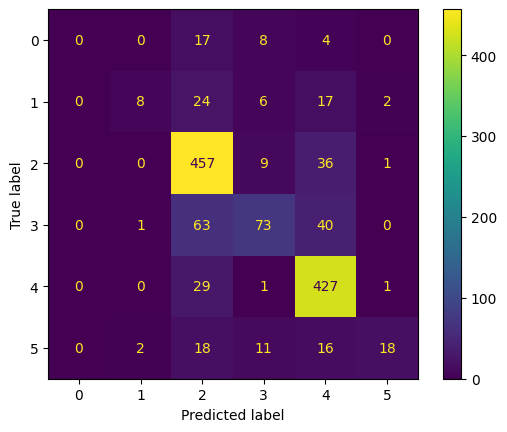

In [ ]:
nb_best_model_tfidf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(nb_best_model_tfidf_accuracy * 100))

print('Confusion Matrix:')
confmat = (confusion_matrix(y_test, y_pred))
print(confmat)
print('Classification Report:')
print(classification_report(y_test, y_pred))


# Create a scatter plot of predicted vs true labels
disp = ConfusionMatrixDisplay(confusion_matrix= confmat, display_labels=nb_best_model_tfidf.classes_)
disp.plot()
plt.show()

###**SVC (Support Vector Machine)**
Using LinearSVC()

also defining a list of hyperparameters

In [ ]:
svc_param_grid = {'C': [0.1, 1, 10], 'loss': ['hinge', 'squared_hinge'], 'max_iter': [100, 500, 1000]}

# Define the LinearSVC model
svc_model_tfidf = LinearSVC()

# Perform grid search to find the best hyperparameters for LinearSVC
svc_grid_search = GridSearchCV(svc_model_tfidf, svc_param_grid, cv=5, scoring='accuracy')
svc_grid_search.fit(X_train_tfid, y_train)

# Print the best hyperparameters for LinearSVC
print("Best hyperparameters for LinearSVC:", svc_grid_search.best_params_)

# Train a new model with the best hyperparameters for LinearSVC
svc_best_model_tfidf = LinearSVC(**svc_grid_search.best_params_)
svc_best_model_tfidf.fit(X_train_tfid, y_train)

# Evaluate the model with the best hyperparameters for LinearSVC on the test set
y_pred1 = svc_best_model_tfidf.predict(X_test_tfid)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Best hyperparameters for LinearSVC: {'C': 0.1, 'loss': 'squared_hinge', 'max_iter': 100}


####Model Accuracy

Accuracy: 78.82%
Confusion Matrix:
[[  4   1  11  10   3   0]
 [  0  21  14  10   8   4]
 [  1   2 443  24  29   4]
 [  2   2  48  99  22   4]
 [  0   1  30  11 415   1]
 [  1   0  12   8  10  34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.14      0.22        29
           1       0.78      0.37      0.50        57
           2       0.79      0.88      0.84       503
           3       0.61      0.56      0.58       177
           4       0.85      0.91      0.88       458
           5       0.72      0.52      0.61        65

    accuracy                           0.79      1289
   macro avg       0.71      0.56      0.60      1289
weighted avg       0.78      0.79      0.78      1289



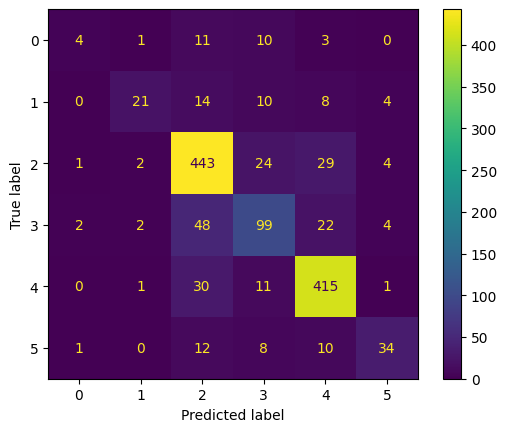

In [ ]:
svc_best_model_tfidf_accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy: {:.2f}%".format(svc_best_model_tfidf_accuracy * 100))

print('Confusion Matrix:')
confmat = (confusion_matrix(y_test, y_pred1))
print(confmat)
print('Classification Report:')
print(classification_report(y_test, y_pred1))


# Create a scatter plot of predicted vs true labels
disp = ConfusionMatrixDisplay(confusion_matrix= confmat, display_labels=svc_best_model_tfidf.classes_)
disp.plot()
plt.show()

###**Logistic Regression Classifier**
using Logisticregression()

also defining a list of hyperparameters

In [ ]:
lr_param_grid = {'C': [0.1, 1, 10], 'max_iter': [100, 500, 1000], 'n_jobs': [1, -1]}

# Define the logistic regression model
lr_model_tfidf = LogisticRegression()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(lr_model_tfidf, lr_param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfid, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Train a new model with the best hyperparameters
lr_best_model_tfidf = LogisticRegression(**grid_search.best_params_)
lr_best_model_tfidf.fit(X_train_tfid, y_train)

# Evaluate the model with the best hyperparameters on the test set
y_pred2 = lr_best_model_tfidf.predict(X_test_tfid)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best hyperparameters: {'C': 10, 'max_iter': 100, 'n_jobs': -1}


####Model Accuracy

Accuracy: 77.89%
Confusion Matrix:
[[  3   0  14   9   3   0]
 [  0  15  17   6  15   4]
 [  0   1 444  26  30   2]
 [  2   0  54  96  22   3]
 [  0   0  34  10 413   1]
 [  1   1  13   9   8  33]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.10      0.17        29
           1       0.88      0.26      0.41        57
           2       0.77      0.88      0.82       503
           3       0.62      0.54      0.58       177
           4       0.84      0.90      0.87       458
           5       0.77      0.51      0.61        65

    accuracy                           0.78      1289
   macro avg       0.73      0.53      0.58      1289
weighted avg       0.77      0.78      0.76      1289



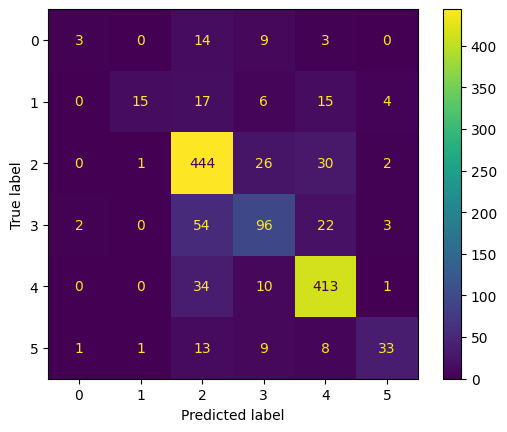

In [ ]:
lr_model_tfidf_accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy: {:.2f}%".format(lr_model_tfidf_accuracy * 100))

print('Confusion Matrix:')
confmat = (confusion_matrix(y_test, y_pred2))
print(confmat)
print('Classification Report:')
print(classification_report(y_test, y_pred2))


# Create a scatter plot of predicted vs true labels
disp = ConfusionMatrixDisplay(confusion_matrix= confmat, display_labels=lr_best_model_tfidf.classes_)
disp.plot()
plt.show()

###**Random Forest Classifier**
using RandomForestClassifier()

also defining a list of hyperparameters

In [ ]:
rfc_param_grid = {'n_estimators': [100, 300, 500],
              'max_depth': [10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'bootstrap': [True, False]}

# Define the RandomForestClassifier model
rfc_model_tfidf = RandomForestClassifier(random_state=42)

# Perform grid search to find the best hyperparameters for the RandomForestClassifier
grid_search = GridSearchCV(rfc_model_tfidf, rfc_param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfid, y_train)

# Print the best hyperparameters for the RandomForestClassifier
print("Best hyperparameters for RandomForestClassifier:", grid_search.best_params_)

# Train a new model with the best hyperparameters for the RandomForestClassifier
rfc_best_model_tfidf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
rfc_best_model_tfidf.fit(X_train_tfid, y_train)

# Evaluate the model with the best hyperparameters for the RandomForestClassifier on the test set
y_pred3 = rfc_best_model_tfidf.predict(X_test_tfid)


Best hyperparameters for RandomForestClassifier: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


####Model Accuracy

Accuracy: 67.03%
Confusion Matrix:
[[  0   0  27   0   2   0]
 [  0   0  48   0   9   0]
 [  0   0 477   0  26   0]
 [  0   0 150  13  14   0]
 [  0   0  89   0 369   0]
 [  0   0  48   0  12   5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.00      0.00      0.00        57
           2       0.57      0.95      0.71       503
           3       1.00      0.07      0.14       177
           4       0.85      0.81      0.83       458
           5       1.00      0.08      0.14        65

    accuracy                           0.67      1289
   macro avg       0.57      0.32      0.30      1289
weighted avg       0.71      0.67      0.60      1289



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


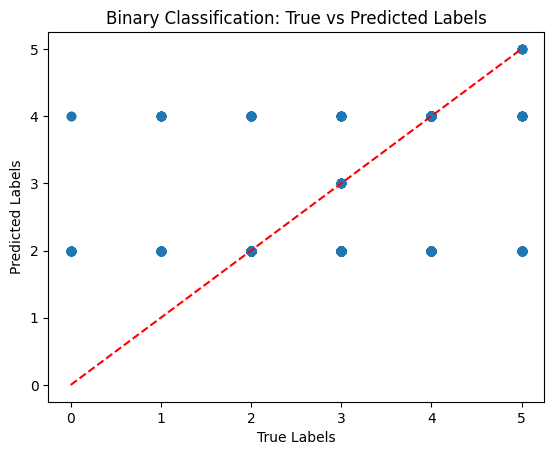

In [ ]:
rfc_best_model_tfidf = accuracy_score(y_test, y_pred3)
print("Accuracy: {:.2f}%".format(rfc_best_model_tfidf * 100))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred3))
print('Classification Report:')
print(classification_report(y_test, y_pred3))


# Create a scatter plot of predicted vs true labels
plt.scatter(y_test, y_pred3)
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.title("Binary Classification: True vs Predicted Labels")

# Add a diagonal line to show perfect prediction
plt.plot([0, 5], [0, 5], '--', color='red')

# Display the plot
plt.show()

.

.

##CountVectorizer



*   **[CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)** Convert a collection of text documents to a matrix of token counts.




In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

Creating a TF-IDF vectorizing model

In [ ]:
cv_vectorizer = CountVectorizer(stop_words='english')
cv_vectorizer_model = cv_vectorizer.fit(X_train, X_test)

Applying the TF-IDF model to transform the text into features

In [ ]:
X_train_cv = cv_vectorizer_model.transform(X_train)
X_test_cv = cv_vectorizer_model.transform(X_test)


In [ ]:
print(X_train_cv)

  (0, 2225)	1
  (0, 3164)	1
  (0, 4216)	1
  (0, 8108)	1
  (0, 8824)	1
  (0, 9736)	1
  (0, 9761)	1
  (0, 11048)	1
  (0, 11181)	1
  (0, 11399)	1
  (0, 12307)	1
  (0, 12590)	1
  (0, 12845)	1
  (0, 13963)	1
  (0, 14406)	1
  (0, 16494)	1
  (0, 17428)	1
  (0, 17807)	1
  (0, 18440)	1
  (0, 18496)	1
  (1, 567)	1
  (1, 571)	1
  (1, 4682)	1
  (1, 4941)	1
  (1, 6628)	1
  :	:
  (5151, 15376)	1
  (5151, 17141)	2
  (5151, 17428)	1
  (5151, 18424)	1
  (5151, 18496)	2
  (5152, 3323)	1
  (5152, 3782)	1
  (5152, 3968)	1
  (5152, 10188)	1
  (5152, 10352)	1
  (5152, 10928)	2
  (5152, 11854)	1
  (5152, 12484)	1
  (5152, 12712)	1
  (5152, 18124)	2
  (5152, 18424)	1
  (5153, 4145)	1
  (5153, 4749)	1
  (5153, 6686)	1
  (5153, 9821)	1
  (5153, 11056)	1
  (5153, 11724)	1
  (5153, 17428)	1
  (5153, 17442)	1
  (5153, 17642)	1


###**Native Bayes classifier**
using MultinomialNB()

and also defining a list of hyperparameters

In [ ]:
nb_model_cv = MultinomialNB()

nb_param_grid = {'alpha': [0.1, 1, 10]}

nb_grid_search = GridSearchCV(nb_model_cv, nb_param_grid, cv=5, scoring='accuracy')
nb_grid_search.fit(X_train_cv, y_train)

# Print the best hyperparameters for MultinomialNB
print("Best hyperparameters for MultinomialNB:", nb_grid_search.best_params_)

# Train a new model with the best hyperparameters for MultinomialNB
nb_best_model_cv = MultinomialNB(**nb_grid_search.best_params_)
nb_best_model_cv.fit(X_train_cv, y_train)

# Evaluate the model with the best hyperparameters for MultinomialNB on the test set
y_predict = nb_best_model_cv.predict(X_test_cv)

Best hyperparameters for MultinomialNB: {'alpha': 1}


####Model Accuracy

Accuracy: 78.74%
Confusion Matrix:
[[  1   1   9  10   8   0]
 [  0  13  14  14  14   2]
 [  0   2 461   9  31   0]
 [  0   0  69  84  24   0]
 [  0   0  18   2 437   1]
 [  0   2  20  10  14  19]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.03      0.07        29
           1       0.72      0.23      0.35        57
           2       0.78      0.92      0.84       503
           3       0.65      0.47      0.55       177
           4       0.83      0.95      0.89       458
           5       0.86      0.29      0.44        65

    accuracy                           0.79      1289
   macro avg       0.81      0.48      0.52      1289
weighted avg       0.79      0.79      0.76      1289



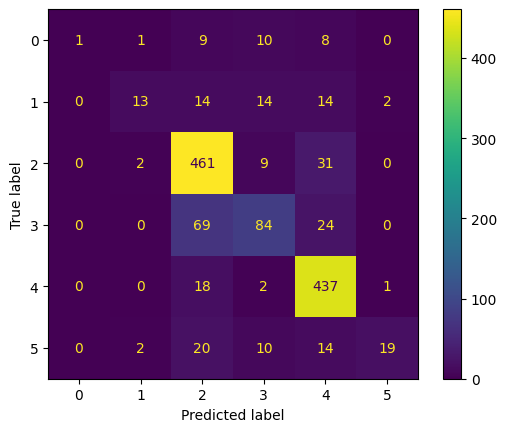

In [ ]:
nb_best_model_cv_accuracy = accuracy_score(y_test, y_predict)
print("Accuracy: {:.2f}%".format(nb_best_model_cv_accuracy * 100))

print('Confusion Matrix:')
confmat = (confusion_matrix(y_test, y_predict))
print(confmat)
print('Classification Report:')
print(classification_report(y_test, y_predict))


# Create a scatter plot of predicted vs true labels
disp = ConfusionMatrixDisplay(confusion_matrix= confmat, display_labels=nb_best_model_cv.classes_)
disp.plot()
plt.show()

###**SVC (Support Vector Machine)**
Using LinearSVC()

also defining a list of hyperparameters

In [ ]:
svc_param_grid = {'C': [0.1, 1, 10], 'loss': ['hinge', 'squared_hinge'], 'max_iter': [100, 500, 1000]}

# Define the LinearSVC model
svc_model_cv = LinearSVC()

# Perform grid search to find the best hyperparameters for LinearSVC
svc_grid_search = GridSearchCV(svc_model_cv, svc_param_grid, cv=5, scoring='accuracy')
svc_grid_search.fit(X_train_cv, y_train)

# Print the best hyperparameters for LinearSVC
print("Best hyperparameters for LinearSVC:", svc_grid_search.best_params_)

# Train a new model with the best hyperparameters for LinearSVC
svc_best_model_cv = LinearSVC(**svc_grid_search.best_params_)
svc_best_model_cv.fit(X_train_cv, y_train)

# Evaluate the model with the best hyperparameters for LinearSVC on the test set
y_predict1 = svc_best_model_cv.predict(X_test_cv)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Best hyperparameters for LinearSVC: {'C': 0.1, 'loss': 'hinge', 'max_iter': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


####Model Accuracy

Accuracy: 81.30%
Confusion Matrix:
[[  4   1   8  10   4   2]
 [  0  25  12   9   5   6]
 [  1   3 450  12  28   9]
 [  0   4  51 102  16   4]
 [  0   1  19   7 429   2]
 [  1   3   8   6   9  38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.14      0.23        29
           1       0.68      0.44      0.53        57
           2       0.82      0.89      0.86       503
           3       0.70      0.58      0.63       177
           4       0.87      0.94      0.90       458
           5       0.62      0.58      0.60        65

    accuracy                           0.81      1289
   macro avg       0.73      0.59      0.63      1289
weighted avg       0.80      0.81      0.80      1289



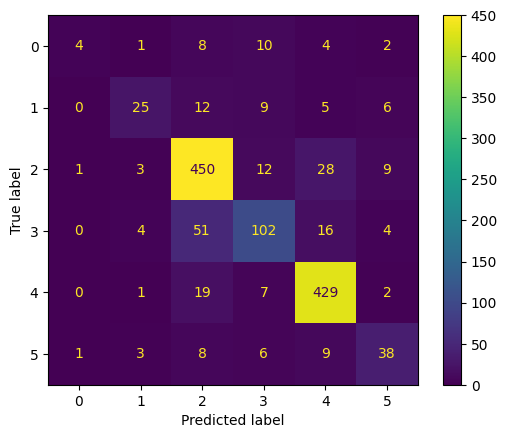

In [ ]:
svc_best_model_cv_accuracy = accuracy_score(y_test, y_predict1)
print("Accuracy: {:.2f}%".format(svc_best_model_cv_accuracy * 100))

print('Confusion Matrix:')
confmat = (confusion_matrix(y_test, y_predict1))
print(confmat)
print('Classification Report:')
print(classification_report(y_test, y_predict1))


# Create a scatter plot of predicted vs true labels
disp = ConfusionMatrixDisplay(confusion_matrix= confmat, display_labels=svc_best_model_cv.classes_)
disp.plot()
plt.show()

###**Logistic Regression Classifier**
using Logisticregression()

also defining a list of hyperparameters

In [ ]:
lr_param_grid = {'C': [0.1, 1, 10], 'max_iter': [100, 500, 1000], 'n_jobs': [1, -1]}

# Define the logistic regression model
lr_model_cv = LogisticRegression()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(lr_model_cv, lr_param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_cv, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Train a new model with the best hyperparameters
lr_best_model_cv = LogisticRegression(**grid_search.best_params_)
lr_best_model_cv.fit(X_train_cv, y_train)

# Evaluate the model with the best hyperparameters on the test set
y_predict2 = lr_best_model_cv.predict(X_test_cv)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best hyperparameters: {'C': 10, 'max_iter': 500, 'n_jobs': 1}


####Model Accuracy

Accuracy: 81.07%
Confusion Matrix:
[[  5   1  10   8   4   1]
 [  1  24   9  12   6   5]
 [  1   2 453  17  24   6]
 [  1   1  49 107  17   2]
 [  0   1  23  10 423   1]
 [  0   2  12   9   9  33]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.17      0.27        29
           1       0.77      0.42      0.55        57
           2       0.81      0.90      0.86       503
           3       0.66      0.60      0.63       177
           4       0.88      0.92      0.90       458
           5       0.69      0.51      0.58        65

    accuracy                           0.81      1289
   macro avg       0.74      0.59      0.63      1289
weighted avg       0.80      0.81      0.80      1289



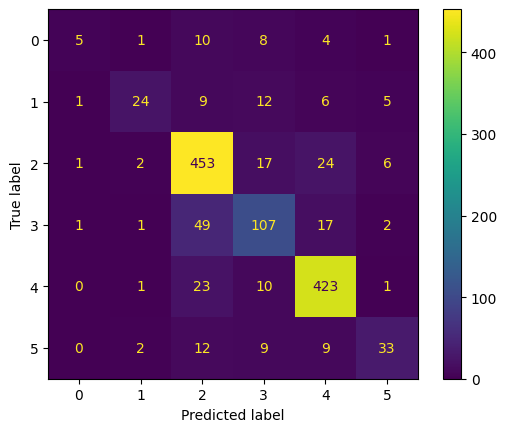

In [ ]:
lr_best_model_cv_accuracy = accuracy_score(y_test, y_predict2)
print("Accuracy: {:.2f}%".format(lr_best_model_cv_accuracy * 100))

print('Confusion Matrix:')
confmat = (confusion_matrix(y_test, y_predict2))
print(confmat)
print('Classification Report:')
print(classification_report(y_test, y_predict2))


# Create a scatter plot of predicted vs true labels
disp = ConfusionMatrixDisplay(confusion_matrix= confmat, display_labels=lr_best_model_cv.classes_)
disp.plot()
plt.show()

###**Random Forest Classifier**
using RandomForestClassifier()

also dedining a list of hyperparameters

In [ ]:

# Define the hyperparameters to search over for the RandomForestClassifier
rfc_param_grid = {'n_estimators': [100, 300, 500],
              'max_depth': [10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'bootstrap': [True, False]}

# Define the RandomForestClassifier model
rfc_model_cv = RandomForestClassifier(random_state=42)

# Perform grid search to find the best hyperparameters for the RandomForestClassifier
grid_search = GridSearchCV(rfc_model_cv, rfc_param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_cv, y_train)

# Print the best hyperparameters for the RandomForestClassifier
print("Best hyperparameters for RandomForestClassifier:", grid_search.best_params_)

# Train a new model with the best hyperparameters for the RandomForestClassifier
rfc_best_model_cv = RandomForestClassifier(**grid_search.best_params_, random_state=42)
rfc_best_model_cv.fit(X_train_cv, y_train)

# Evaluate the model with the best hyperparameters for the RandomForestClassifier on the test set
y_predict3 = rfc_best_model_cv.predict(X_test_cv)


Best hyperparameters for RandomForestClassifier: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


####Model Accuracy

Accuracy: 69.20%
Confusion Matrix:
[[  0   0  28   0   0   0]
 [  0   1  45   0   9   1]
 [  0   0 475   0  20   2]
 [  0   0 143  22  14   0]
 [  0   0  71   0 389   0]
 [  0   0  53   1  10   5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       1.00      0.02      0.04        56
           2       0.58      0.96      0.72       497
           3       0.96      0.12      0.22       179
           4       0.88      0.85      0.86       460
           5       0.62      0.07      0.13        69

    accuracy                           0.69      1289
   macro avg       0.67      0.34      0.33      1289
weighted avg       0.75      0.69      0.63      1289



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


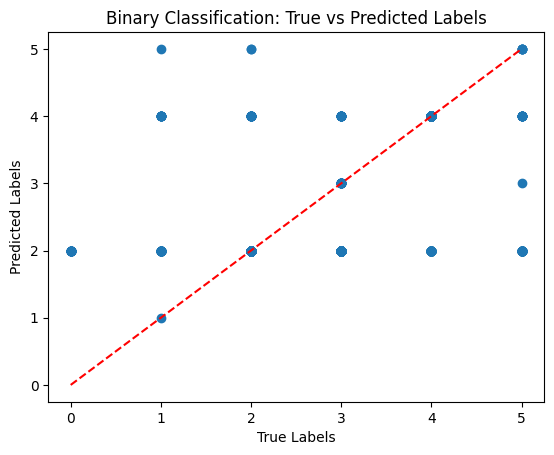

In [ ]:
rfc_best_model_cv_accuracy = accuracy_score(y_test, y_predict3)
print("Accuracy: {:.2f}%".format(rfc_best_model_cv_accuracy * 100))

print('Confusion Matrix:')
confmat = (confusion_matrix(y_test, y_predict3))
print(confmat)
print('Classification Report:')
print(classification_report(y_test, y_predict3))


# Create a scatter plot of predicted vs true labels
disp = ConfusionMatrixDisplay(confusion_matrix= confmat, display_labels=rfc_best_model_cv.classes_)
disp.plot()
plt.show()

.

.

##Word Embedding "Word2vec"



*   **[Word2Vec](https://www.analyticsvidhya.com/blog/2021/07/word2vec-for-word-embeddings-a-beginners-guide/)** creates vectors of the words that are distributed numerical representations of word features – these word features could comprise of words that represent the context of the individual words present in our vocabulary. Word embeddings eventually help in establishing the association of a word with another similar meaning word through the created vectors.

###Creating a function to tokenize the text using word2vec

In [ ]:
import re
import gensim
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec

# Initialize NLTK resources

def clean_text_w2c(text, model):
    # Tokenize text into words
    words = nltk.word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in nltk.corpus.stopwords.words('english')]
    # Get word embeddings for each word
    embeddings = []
    for word in words:
        if word in model.wv.key_to_index:
            embeddings.append(model.wv[word])
        else:
            embeddings.append(np.zeros(model.vector_size))
    # Combine embeddings to form text vector
    text_vector = np.mean(embeddings, axis=0)
    return text_vector





####Converting training data to word2vec, word2vec can only work with list items and not string object

In [ ]:
print(type(X_train))

<class 'pandas.core.series.Series'>


In [ ]:
X_train_tok = X_train.tolist()
X_test_tok = X_test.tolist()


print(type(X_train_tok))


<class 'list'>


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


####Creating a Word2Vec model

In [ ]:
# Train word2vec model on combined text of X_train and X_test
w2v_model = gensim.models.Word2Vec([nltk.word_tokenize(text) for text in X_train_tok + X_test_tok], min_count=1,vector_size=10)

X_train_w2c = [clean_text_w2c(text, w2v_model) for text in X_train_tok]
X_test_w2c = [clean_text_w2c(text, w2v_model) for text in X_test_tok]

In [ ]:
X_train_w2c

[array([ 0.15260547, -0.36471516,  0.5108184 ,  0.15182446,  0.6055422 ,
        -0.7434464 ,  2.7169125 ,  2.0190127 , -3.0565405 , -0.8905353 ],
       dtype=float32),
 array([ 0.5184851 , -0.5653765 ,  0.9621706 ,  0.09030309,  0.1780185 ,
        -0.8670993 ,  2.9313965 ,  2.4761717 , -3.5375752 , -1.3860508 ],
       dtype=float32),
 array([ 0.33846965, -0.8962859 ,  0.8593994 ,  0.14489616,  0.22631419,
        -0.6825955 ,  3.0318377 ,  3.8563485 , -4.3820357 , -1.4230592 ],
       dtype=float32),
 array([ 0.2100988 , -0.73740685,  0.5534255 ,  0.49825343,  0.17400102,
        -1.1467663 ,  3.8557222 ,  4.51648   , -5.2260695 , -1.5383507 ],
       dtype=float32),
 array([ 0.2556235 , -0.36293405,  0.6282927 ,  0.44899064,  0.25060382,
        -0.91206473,  2.6711411 ,  2.9506314 , -3.9895408 , -1.1445396 ],
       dtype=float32),
 array([ 0.2585482 , -0.45494485,  0.5100535 ,  0.2087574 ,  0.3431948 ,
        -0.54990005,  2.3914924 ,  2.4269435 , -3.1253908 , -0.97195417],
   

####Converting the negative numbers in the transformed data to positive

In [ ]:
# Convert negative numbers to positive in X_train_w2c
X_train_w2c = [[abs(num) for num in vector] for vector in X_train_w2c]

# Convert negative numbers to positive in X_test_w2c
X_test_w2c = [[abs(num) for num in vector] for vector in X_test_w2c]


In [ ]:
X_train_w2c

[[0.15260547,
  0.36471516,
  0.5108184,
  0.15182446,
  0.6055422,
  0.7434464,
  2.7169125,
  2.0190127,
  3.0565405,
  0.8905353],
 [0.5184851,
  0.5653765,
  0.9621706,
  0.09030309,
  0.1780185,
  0.8670993,
  2.9313965,
  2.4761717,
  3.5375752,
  1.3860508],
 [0.33846965,
  0.8962859,
  0.8593994,
  0.14489616,
  0.22631419,
  0.6825955,
  3.0318377,
  3.8563485,
  4.3820357,
  1.4230592],
 [0.2100988,
  0.73740685,
  0.5534255,
  0.49825343,
  0.17400102,
  1.1467663,
  3.8557222,
  4.51648,
  5.2260695,
  1.5383507],
 [0.2556235,
  0.36293405,
  0.6282927,
  0.44899064,
  0.25060382,
  0.91206473,
  2.6711411,
  2.9506314,
  3.9895408,
  1.1445396],
 [0.2585482,
  0.45494485,
  0.5100535,
  0.2087574,
  0.3431948,
  0.54990005,
  2.3914924,
  2.4269435,
  3.1253908,
  0.97195417],
 [0.30148637,
  0.6509607,
  0.5134211,
  0.1875122,
  0.46174696,
  0.07984957,
  2.089671,
  1.6081146,
  2.022552,
  0.48299274],
 [0.2993701,
  0.39482313,
  0.54942286,
  0.5162934,
  0.22975096

###**Native Bayes classifier**
using MultinomialNB()

and also defining a list of hyperparameters

In [ ]:
nb_model_w2c = MultinomialNB()

nb_param_grid = {'alpha': [0.1, 1, 10]}

nb_grid_search = GridSearchCV(nb_model_w2c, nb_param_grid, cv=5, scoring='accuracy')
nb_grid_search.fit(X_train_w2c, y_train)

# Print the best hyperparameters for MultinomialNB
print("Best hyperparameters for MultinomialNB:", nb_grid_search.best_params_)

# Train a new model with the best hyperparameters for MultinomialNB
nb_best_model_w2c = MultinomialNB(**nb_grid_search.best_params_)
nb_best_model_w2c.fit(X_train_w2c, y_train)

# Evaluate the model with the best hyperparameters for MultinomialNB on the test set
y_prediction = nb_best_model_w2c.predict(X_test_w2c)

Best hyperparameters for MultinomialNB: {'alpha': 0.1}


####Model Accuracy

Accuracy: 40.50%
Confusion Matrix:
[[  0   0  20   0   9   0]
 [  0   0  39   0  18   0]
 [  0   0 355   0 148   0]
 [  0   0  88   0  89   0]
 [  0   0 291   0 167   0]
 [  0   0  46   0  19   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.00      0.00      0.00        57
           2       0.42      0.71      0.53       503
           3       0.00      0.00      0.00       177
           4       0.37      0.36      0.37       458
           5       0.00      0.00      0.00        65

    accuracy                           0.40      1289
   macro avg       0.13      0.18      0.15      1289
weighted avg       0.30      0.40      0.34      1289



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


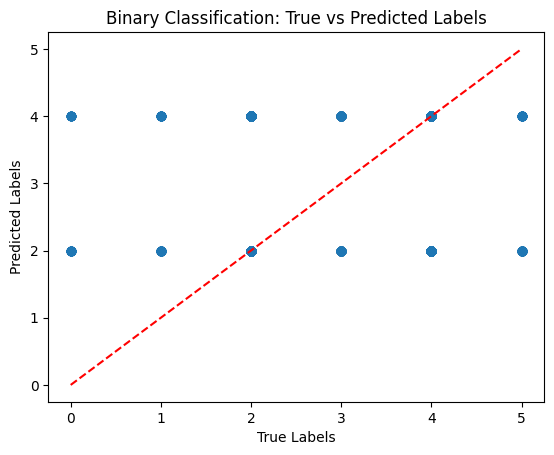

In [ ]:
nb_best_model_w2c_accuracy = accuracy_score(y_test, y_prediction)
print("Accuracy: {:.2f}%".format(nb_best_model_w2c_accuracy * 100))

print('Confusion Matrix:')
confmat = (confusion_matrix(y_test, y_prediction))
print(confmat)
print('Classification Report:')
print(classification_report(y_test, y_prediction))


# Create a scatter plot of predicted vs true labels
disp = ConfusionMatrixDisplay(confusion_matrix= confmat, display_labels=nb_best_model_w2c.classes_)
disp.plot()
plt.show()

###**SVC (Support Vector Machine)**
Using LinearSVC()

also defining a list of hyperparameters

In [ ]:
svc_param_grid = {'C': [0.1, 1, 10], 'loss': ['hinge', 'squared_hinge'], 'max_iter': [100, 500, 1000]}

# Define the LinearSVC model
svc_model_W2c = LinearSVC()

# Perform grid search to find the best hyperparameters for LinearSVC
svc_grid_search = GridSearchCV(svc_model_W2c, svc_param_grid, cv=5, scoring='accuracy')
svc_grid_search.fit(X_train_w2c, y_train)

# Print the best hyperparameters for LinearSVC
print("Best hyperparameters for LinearSVC:", svc_grid_search.best_params_)

# Train a new model with the best hyperparameters for LinearSVC
svc_best_model_w2c = LinearSVC(**svc_grid_search.best_params_)
svc_best_model_w2c.fit(X_train_w2c, y_train)

# Evaluate the model with the best hyperparameters for LinearSVC on the test set
y_prediction1 = svc_best_model_w2c.predict(X_test_w2c)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Best hyperparameters for LinearSVC: {'C': 1, 'loss': 'squared_hinge', 'max_iter': 1000}


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


####Model Accuracy

Accuracy: 46.94%
Confusion Matrix:
[[  0   0  11   0  18   0]
 [  0   0  26   0  31   0]
 [  0   0 332   7 164   0]
 [  0   0  63  20  94   0]
 [  0   0 200   5 253   0]
 [  0   0  28   1  36   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.00      0.00      0.00        57
           2       0.50      0.66      0.57       503
           3       0.61      0.11      0.19       177
           4       0.42      0.55      0.48       458
           5       0.00      0.00      0.00        65

    accuracy                           0.47      1289
   macro avg       0.26      0.22      0.21      1289
weighted avg       0.43      0.47      0.42      1289



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


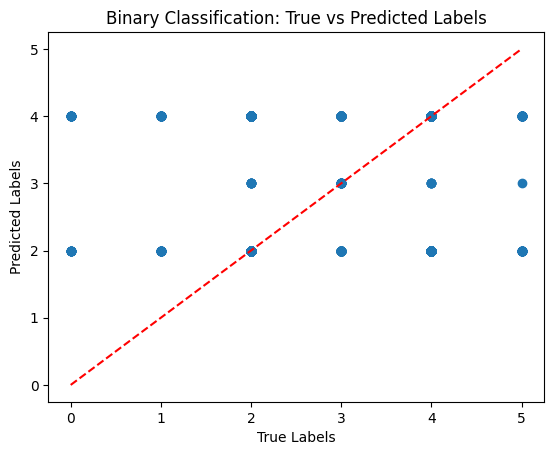

In [ ]:
svc_best_model_w2c_accuracy = accuracy_score(y_test, y_prediction1)
print("Accuracy: {:.2f}%".format(svc_best_model_w2c_accuracy * 100))

print('Confusion Matrix:')
confmat = (confusion_matrix(y_test, y_prediction1))
print(confmat)
print('Classification Report:')
print(classification_report(y_test, y_prediction1))


# Create a scatter plot of predicted vs true labels
disp = ConfusionMatrixDisplay(confusion_matrix= confmat, display_labels=svc_best_model_w2c.classes_)
disp.plot()
plt.show()

###**Logistic Regression Classifier**
using Logisticregression()

also defining a list of hyperparameters

In [ ]:
lr_param_grid = {'C': [0.1, 1, 10], 'max_iter': [100, 500, 1000], 'n_jobs': [1, -1]}

# Define the logistic regression model
lr_model_w2c = LogisticRegression()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(lr_model_w2c, lr_param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_w2c, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Train a new model with the best hyperparameters
lr_best_model_w2c = LogisticRegression(**grid_search.best_params_)
lr_best_model_w2c.fit(X_train_w2c, y_train)

# Evaluate the model with the best hyperparameters on the test set
y_prediction2 = lr_best_model_w2c.predict(X_test_w2c)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best hyperparameters: {'C': 10, 'max_iter': 500, 'n_jobs': 1}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


####Model Accuracy

Accuracy: 47.32%
Confusion Matrix:
[[  0   0   9   0  20   0]
 [  0   0  26   3  28   0]
 [  0   0 322  17 164   0]
 [  0   0  53  33  91   0]
 [  0   0 183  20 255   0]
 [  0   0  25   3  37   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.00      0.00      0.00        57
           2       0.52      0.64      0.57       503
           3       0.43      0.19      0.26       177
           4       0.43      0.56      0.48       458
           5       0.00      0.00      0.00        65

    accuracy                           0.47      1289
   macro avg       0.23      0.23      0.22      1289
weighted avg       0.42      0.47      0.43      1289



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


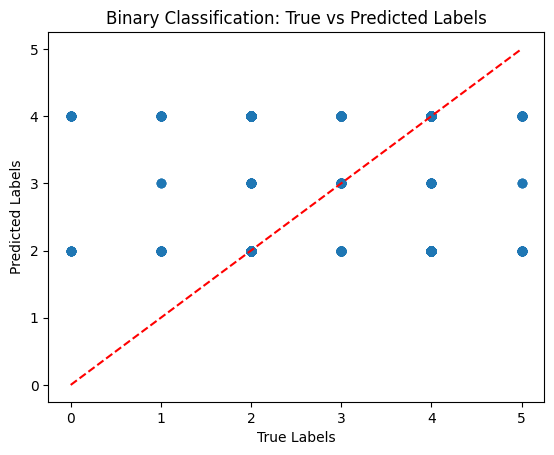

In [ ]:
lr_best_model_w2c_accuracy = accuracy_score(y_test, y_prediction2)
print("Accuracy: {:.2f}%".format(lr_best_model_w2c_accuracy * 100))

print('Confusion Matrix:')
confmat = (confusion_matrix(y_test, y_prediction2))
print(confmat)
print('Classification Report:')
print(classification_report(y_test, y_prediction2))


# Create a scatter plot of predicted vs true labels
disp = ConfusionMatrixDisplay(confusion_matrix= confmat, display_labels=svc_best_model_w2c.classes_)
disp.plot()
plt.show()

###**Random Forest Classifier**
using RandomForestClassifier()

also defining a list of hyperparameters

In [ ]:
rfc_param_grid = {'n_estimators': [100, 300, 500],
              'max_depth': [10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'bootstrap': [True, False]}

# Define the RandomForestClassifier model
rfc_model_w2c = RandomForestClassifier(random_state=42)

# Perform grid search to find the best hyperparameters for the RandomForestClassifier
grid_search = GridSearchCV(rfc_model_w2c, rfc_param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_w2c, y_train)

# Print the best hyperparameters for the RandomForestClassifier
print("Best hyperparameters for RandomForestClassifier:", grid_search.best_params_)

# Train a new model with the best hyperparameters for the RandomForestClassifier
rfc_best_model_w2c = RandomForestClassifier(**grid_search.best_params_, random_state=42)
rfc_best_model_w2c.fit(X_train_w2c, y_train)

# Evaluate the model with the best hyperparameters for the RandomForestClassifier on the test set
y_prediction3 = rfc_best_model_w2c.predict(X_test_w2c)


Best hyperparameters for RandomForestClassifier: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


####Model Accuracy

Accuracy: 69.20%
Confusion Matrix:
[[  0   0  28   0   0   0]
 [  0   1  45   0   9   1]
 [  0   0 475   0  20   2]
 [  0   0 143  22  14   0]
 [  0   0  71   0 389   0]
 [  0   0  53   1  10   5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       1.00      0.02      0.04        56
           2       0.58      0.96      0.72       497
           3       0.96      0.12      0.22       179
           4       0.88      0.85      0.86       460
           5       0.62      0.07      0.13        69

    accuracy                           0.69      1289
   macro avg       0.67      0.34      0.33      1289
weighted avg       0.75      0.69      0.63      1289



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


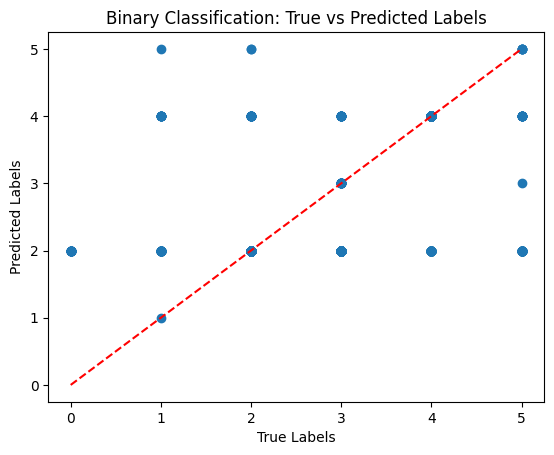

In [ ]:
rfc_best_model_w2c_accuracy = accuracy_score(y_test, y_prediction3)
print("Accuracy: {:.2f}%".format(rfc_best_model_w2c_accuracy * 100))

print('Confusion Matrix:')
confmat = (confusion_matrix(y_test, y_prediction3))
print(confmat)
print('Classification Report:')
print(classification_report(y_test, y_prediction3))


# Create a scatter plot of predicted vs true labels
disp = ConfusionMatrixDisplay(confusion_matrix= confmat, display_labels=rfc_best_model_w2c.classes_)
disp.plot()
plt.show()

.

.

##Model Evaluation

####Basically from the analysis the Countvectorizer with LinearSVC is the one with the best result with 81% f1 Score

saving the CountVectorizer model and the LinearVM model for implementation

In [ ]:
import joblib

In [ ]:
joblib.dump(cv_vectorizer_model, '/content/drive/MyDrive/models/cv_vectorizer_model.joblib')

['/content/drive/MyDrive/models/cv_vectorizer_model.joblib']

In [ ]:
joblib.dump(svc_best_model_cv, '/content/drive/MyDrive/models/svc_best_model_cv.joblib')


['/content/drive/MyDrive/models/svc_best_model_cv.joblib']

.

.

##Deployment

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline


data = pd.read_json('/content/drive/MyDrive/datasets/CETM47-22_23-AS2-Data.json')

###A pipeline that can either predict or train the existing model

In [ ]:
# Load the saved vectorizer model
import joblib
vectorizer = joblib.load('/content/drive/MyDrive/models/cv_vectorizer_model.joblib')

# Load the saved ML model
model = joblib.load('/content/svc_model_cv.joblib')

# Create a pipeline using the vectorizer and ML model

pipeline = Pipeline([
    ('vectorizer', vectorizer),
    ('model', model)
])

def predict():
# Use the pipeline to predict on new data
  new_data = request.json['text']

  predictions = pipeline.predict(new_data)

  if predictions == 0:
      result = "arts_&_culture"
  elif predictions == 1:
      result = "business_&_entrepreneurs"
  elif predictions == 2:
      result = "pop_culture"
  elif predictions == 3:
      result = "daily_life"
  elif predictions == 4:
      result = "sports_&_gaming"
  else:
      result = "science_&_technology"
  return (predictions, result)

def retraining():

  X_train, X_test, y_train, y_test = train_test_split(data['text'],data["label"],test_size=0.2,shuffle=True, stratify=data['label'])
  X_train = vectorizer.transform(X_train)
  X_test  = vectorizer.transform(X_test)
  retrain = model.fit(X_train,y_train)
  predicting = retrain.predict(X_test)

  # calculating the model metrics
  accuracy = accuracy_score(y_test, predicting)*100
  confmat = confusion_matrix(y_test, predicting)
  classmat = classification_report(y_test, predicting)


  # Create a scatter plot of predicted vs true labels
  disp = ConfusionMatrixDisplay(confusion_matrix=confmat, display_labels=retrain.classes_)
  disp.plot()
  plt.show()



  if accuracy >= 80:
    joblib.dump(retrain,'svc_model_cv.joblib')
    message = "model saved"

  else:
    message = "model accuracy is below 80%"

  return (message, accuracy, confmat, classmat)



In [ ]:
predict()

(array([2]), 'pop_culture')

####Training the existing model on new data

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


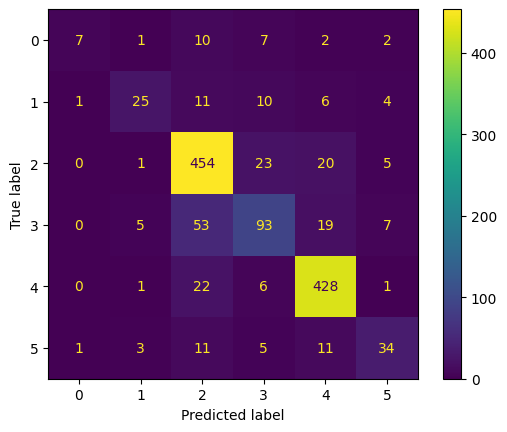

('model saved',
 80.76027928626843,
 array([[  7,   1,  10,   7,   2,   2],
        [  1,  25,  11,  10,   6,   4],
        [  0,   1, 454,  23,  20,   5],
        [  0,   5,  53,  93,  19,   7],
        [  0,   1,  22,   6, 428,   1],
        [  1,   3,  11,   5,  11,  34]]),
 '              precision    recall  f1-score   support\n\n           0       0.78      0.24      0.37        29\n           1       0.69      0.44      0.54        57\n           2       0.81      0.90      0.85       503\n           3       0.65      0.53      0.58       177\n           4       0.88      0.93      0.91       458\n           5       0.64      0.52      0.58        65\n\n    accuracy                           0.81      1289\n   macro avg       0.74      0.59      0.64      1289\nweighted avg       0.80      0.81      0.80      1289\n')

In [ ]:
retraining()